In [36]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data file downloaded 02-27-18
# This will be the file used, data is from 11/1/15 to 2/20/18

# Assign filename
data_022718 = 'crime-datacrime-datacrimestat.csv'

# Read file in DataFrame
crime = pd.read_csv(data_022718, sep=',', low_memory=False, dtype={'ZIP': object})

# Quick view of the data
print(crime.head())
print(crime.info())

# Rename columns
crime.columns = ['incident_num', 'date_occurred_on', 'date_occurred_to', 'crime_cat', '100_block_addr', 'zip', 'premise_type']


        INC NUMBER        OCCURRED ON        OCCURRED TO   UCR CRIME CATEGORY  \
0  201600000052855  11/01/2015  00:00  01/09/2016  00:00  MOTOR VEHICLE THEFT   
1  201600000594484  11/01/2015  00:00                NaN                 RAPE   
2  201500002102327  11/01/2015  00:00  11/01/2015  09:00        LARCENY-THEFT   
3  201500002101405  11/01/2015  00:00  11/01/2015  05:00  MOTOR VEHICLE THEFT   
4  201500002102668  11/01/2015  00:00  11/01/2015  11:50  MOTOR VEHICLE THEFT   

             100 BLOCK ADDR    ZIP         PREMISE TYPE  
0  N 43RD AVE & W CACTUS RD  85029  SINGLE FAMILY HOUSE  
1         13XX E ALMERIA RD  85006  SINGLE FAMILY HOUSE  
2            51XX N 15TH ST  85014            APARTMENT  
3       102XX W MEDLOCK AVE  85307  SINGLE FAMILY HOUSE  
4            69XX W WOOD ST  85043  SINGLE FAMILY HOUSE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148468 entries, 0 to 148467
Data columns (total 7 columns):
INC NUMBER            148468 non-null object
OCCURRED O

## Data Wrangling

In [37]:
# 4 variables have missing data: Occurred On, Occurred To, Zip, Premise Type
print(crime[['date_occurred_on', 'date_occurred_to', 'zip', 'premise_type']].isna().sum())
# 'date_occurred_to' field is blank because the victim knows the exact time the incident occurred and only the 'date_occurred_on' is populated

# Sum number of incidents where occurred_on and occurred_to are NaN
print(crime[(crime.date_occurred_on.isna()) & (crime.date_occurred_to.isna())])

# 
print(crime.loc[crime['zip'].isna()])
print(crime.loc[crime['date_occurred_on'].isna()].head())
print(crime.loc[crime['date_occurred_to'].isna()].head())
print(crime.loc[crime['premise_type'].isna()].head())

date_occurred_on      336
date_occurred_to    43719
zip                     3
premise_type          805
dtype: int64
Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
          incident_num   date_occurred_on   date_occurred_to      crime_cat  \
63037  201700001136425  11/04/2016  00:00  06/25/2017  00:00           RAPE   
79708  201700000206086  02/04/2017  10:00  02/04/2017  10:14  LARCENY-THEFT   
82276  201700000368400  02/18/2017  12:00  02/27/2017  15:23  LARCENY-THEFT   

             100_block_addr  zip             premise_type  
63037       451XX W RHEA RD  NaN                APARTMENT  
79708     XX W BASELINE AVE  NaN          SPECIALTY STORE  
82276  122XX N TABLE TOP RD  NaN  FENCED RESIDENTIAL YARD  
         incident_num date_occurred_on   date_occurred_to      crime_cat  \
248   201500002110561              NaN  11/02/2015  14:40        ROBBERY   
275   201500002132194              NaN  11

In [38]:
# Identify the unique values
print(crime[['crime_cat', 'zip', 'premise_type']].nunique())
print(crime.crime_cat.unique())
print(crime.zip.unique())
#print(crime.premise_type.unique())

crime_cat        9
zip             99
premise_type    94
dtype: int64
['MOTOR VEHICLE THEFT' 'RAPE' 'LARCENY-THEFT' 'DRUG OFFENSE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']
['85029' '85006' '85014' '85307' '85043' '85017' '85085' '85019' '85031'
 '85027' '85024' '85339' '85028' '85018' '85015' '85008' '85254' '85051'
 '85023' '85009' '85044' '85035' '85041' '85003' '85048' '85353' '85016'
 '85022' '85033' '85040' '85007' '85050' '85004' '85054' '85032' '85013'
 '85034' '85042' '85021' '85012' '85053' '85308' '85086' '85020' '85037'
 '85331' '85306' '85083' '85310' '85045' '85087' '85301' '85253' '85304'
 '85255' '85251' '85258' '85225' '85363' '85282' '85268' '85213' '85395'
 '85202' '85201' '85381' '85281' '85210' '85323' '85224' '85345' '85302'
 '85266' '85382' '85392' '85303' '85260' '85286' '85296' '85203' '85248'
 '85295' '85290' '85326' '85234' '85283' '85215' '85226' '85257' '85305'
 nan '85383' '85204' '85337' '85396' '85338' '

In [39]:
# Cleaning the data set

# Remove missing zip code rows and convert to str
crime_clean = crime.drop(crime.index[[63037, 79708, 82276]])
print(crime_clean.loc[crime_clean['zip'].isna()])

# Fill in missing date values with date_occurred_on or date_occurred_to
crime_clean.date_occurred_on.fillna(crime_clean.date_occurred_to, inplace=True)
print(crime_clean.iloc[248])
crime_clean.date_occurred_to.fillna(crime_clean.date_occurred_on, inplace=True)
print(crime_clean.iloc[24])
print(crime_clean[['date_occurred_on', 'date_occurred_to']].isna().sum())

# Premise type NaN convert to Unknown
crime_clean.premise_type = crime_clean.premise_type.fillna('UNKNOWN')


Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
incident_num                            201500002110561
date_occurred_on                      11/02/2015  14:40
date_occurred_to                      11/02/2015  14:40
crime_cat                                       ROBBERY
100_block_addr                       41XX W BASELINE RD
zip                                               85041
premise_type        STREET / ROADWAY / ALLEY / SIDEWALK
Name: 248, dtype: object
incident_num                   201500002100158
date_occurred_on             11/01/2015  00:05
date_occurred_to             11/01/2015  00:05
crime_cat                  MOTOR VEHICLE THEFT
100_block_addr             28XX W CAMELBACK RD
zip                                      85017
premise_type        CONVENIENCE MARKET / STORE
Name: 24, dtype: object
date_occurred_on    0
date_occurred_to    0
dtype: int64


In [40]:
# Convert date columns to datetime
crime_clean['date_occurred_on'] = pd.to_datetime(crime_clean['date_occurred_on'], format='%m/%d/%Y %H:%M')
crime_clean['date_occurred_to'] = pd.to_datetime(crime_clean['date_occurred_to'], format='%m/%d/%Y %H:%M')
#crime_clean.info()

# Break down datetime columns into seperate columns, new columns listed below
# date_occ_on ==> [occ_on_month, occ_on_day, occ_on_year, occ_on_hr, occ_on_min]
crime_clean['occ_on_month'] = crime_clean['date_occurred_on'].dt.month
crime_clean['occ_on_day'] = crime_clean['date_occurred_on'].dt.day
crime_clean['occ_on_year'] = crime_clean['date_occurred_on'].dt.year
crime_clean['occ_on_dayofweek'] = crime_clean['date_occurred_on'].dt.weekday_name
crime_clean['occ_on_time'] = crime_clean['date_occurred_on'].dt.time
crime_clean['occ_on_hr'] = crime_clean['date_occurred_on'].dt.hour
crime_clean['occ_on_min'] = crime_clean['date_occurred_on'].dt.minute

# date_occ_to ==> [occ_to_month, occ_to_day, occ_to_year, occ_to_hr, occ_to_min]
crime_clean['occ_to_month'] = crime_clean['date_occurred_to'].dt.month
crime_clean['occ_to_day'] = crime_clean['date_occurred_to'].dt.day
crime_clean['occ_to_year'] = crime_clean['date_occurred_to'].dt.year
crime_clean['occ_to_dayofweek'] = crime_clean['date_occurred_to'].dt.weekday_name
crime_clean['occ_to_time'] = crime_clean['date_occurred_to'].dt.time
crime_clean['occ_to_hr'] = crime_clean['date_occurred_to'].dt.hour
crime_clean['occ_to_min'] = crime_clean['date_occurred_to'].dt.minute

#crime_clean.head()
#crime_clean.info()


In [41]:
# Classify incident times into 4hr bucket groups
# 1: 0-3, 2: 4-7, 3: 8-11, 4: 12-15, 5: 16-19, 6: 20-23
occ_on_hr_grp = []
for row in crime_clean.occ_on_hr:
    if row in [0,1,2,3]:
        occ_on_hr_grp.append(1)
    elif row in [4,5,6,7]:
        occ_on_hr_grp.append(2)
    elif row in [8,9,10,11]:
        occ_on_hr_grp.append(3)
    elif row in [12,13,14,15]:
        occ_on_hr_grp.append(4)
    elif row in [16,17,18,19]:
        occ_on_hr_grp.append(5)
    else: 
        occ_on_hr_grp.append(6)
    
crime_clean['occ_on_hr_grp'] = occ_on_hr_grp


In [42]:
# Classify incident months into seasons
# Spring(3,4,5), Summer(6,7,8), Fall(9,10,11), Winter(12,1,2)
occ_on_season = []
for row in crime_clean.occ_on_month:
    if row in [3,4,5]:
        occ_on_season.append('Spring')
    elif row in [6,7,8]:
        occ_on_season.append('Summer')
    elif row in [9,10,11]:
        occ_on_season.append('Fall')
    else:
        occ_on_season.append('Winter')
        
crime_clean['occ_on_season'] = occ_on_season

# crime_clean is the clean data set

## Exploratory Data Analysis

**Initial Questions**

 1. What are the top tredning crimes?
 2. When do crimes occur: Month, Day, Year, Season?
 3. Do more crimes occur in certain zip codes?
 4. What is the most common place a crime occurs e.g. house, business, etc.?

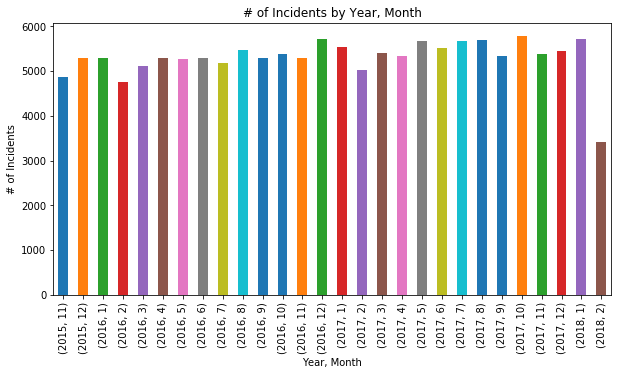

In [77]:
# Number of incidents per month by year
inc_mon_yr = crime_clean.groupby(['occ_on_year', 'occ_on_month'])['incident_num'].count()
inc_mon_yr
inc_mon_yr.plot(kind='bar', figsize=(10,5))
plt.ylabel('# of Incidents')
plt.xlabel('Year, Month')
plt.title('# of Incidents by Year, Month')
plt.show()

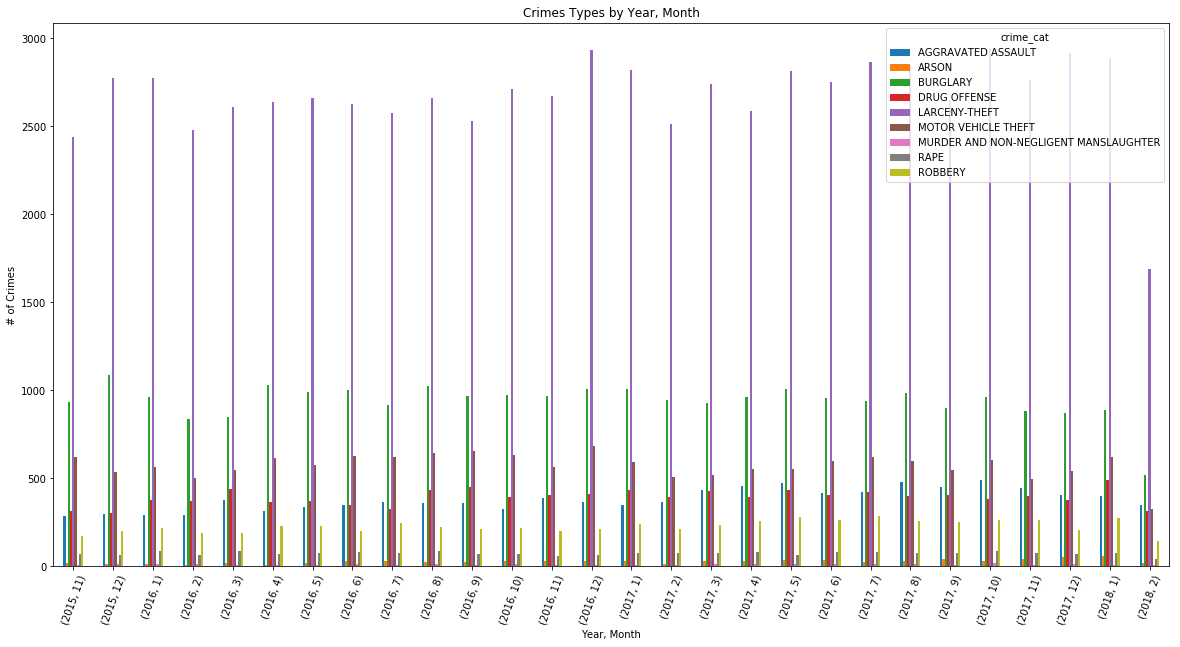

In [76]:
# Number of types of crime per month by year
crime_month = crime_clean.groupby(['occ_on_year','occ_on_month','crime_cat'])['crime_cat'].count()
crime_month.unstack().plot(kind='bar', figsize=(20,10), rot=70)
plt.title('Crimes Types by Year, Month')
plt.xlabel('Year, Month')
plt.ylabel('# of Crimes')
plt.show()

occ_on_dayofweek
Friday       22600
Wednesday    21864
Tuesday      21774
Thursday     21615
Monday       21217
Saturday     20468
Sunday       18927
Name: incident_num, dtype: int64


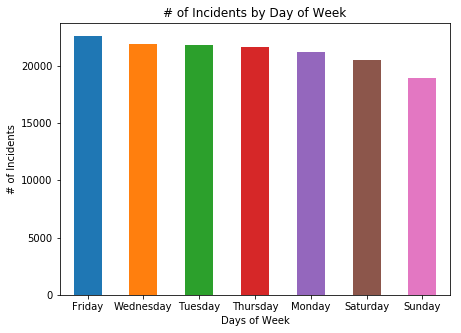

In [45]:
# Day of the week crimes take place
crime_dayofweek = crime_clean.groupby('occ_on_dayofweek')['incident_num'].count().sort_values(ascending=False)
print(crime_dayofweek)
crime_dayofweek.plot(kind='bar', figsize=(7,5), rot=0)
plt.title('# of Incidents by Day of Week')
plt.ylabel('# of Incidents')
plt.xlabel('Days of Week')
plt.show()

occ_on_hr_grp
5    33717
4    29432
6    29193
3    22367
1    20489
2    13267
Name: incident_num, dtype: int64


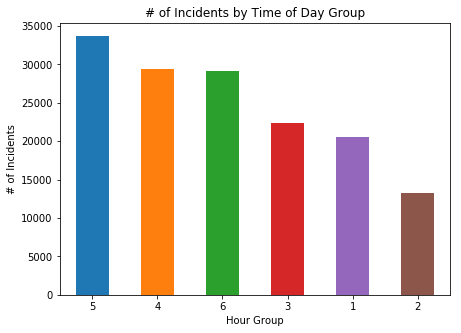

In [46]:
# Time of Day crimes occur
# 1: 0-3, 2: 4-7, 3: 8-11, 4: 12-15, 5: 16-19, 6: 20-23
crime_timeofday = crime_clean.groupby('occ_on_hr_grp')['incident_num'].count().sort_values(ascending=False)
print(crime_timeofday[:10])
crime_timeofday.plot(kind='bar', figsize=(7,5), rot=0,)
plt.title('# of Incidents by Time of Day Group')
plt.xlabel('Hour Group')
plt.ylabel('# of Incidents')
plt.show()

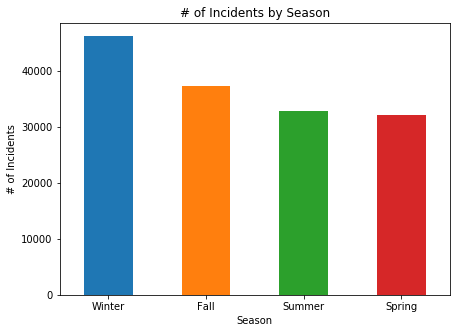

In [47]:
# Time of year most crimes occurred
season_inc = crime_clean.groupby('occ_on_season')['incident_num'].count().sort_values(ascending=False)
season_inc
season_inc.plot(kind='bar', figsize=(7,5), rot=0)
plt.title('# of Incidents by Season')
plt.xlabel('Season')
plt.ylabel('# of Incidents')
plt.show()

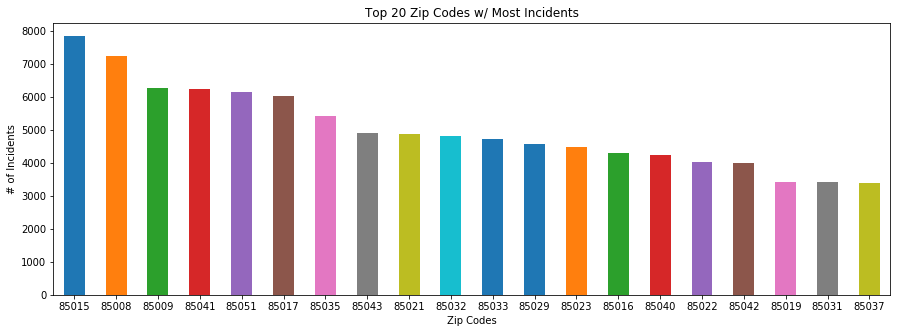

In [48]:
# Crimes by zip code
zip_inc = crime_clean.groupby('zip')['incident_num'].count().sort_values(ascending=False)
zip_inc
zip_inc[0:20].plot(kind='bar', figsize=(15,5), rot=0)
plt.title('Top 20 Zip Codes w/ Most Incidents')
plt.xlabel('Zip Codes')
plt.ylabel('# of Incidents')
plt.show()

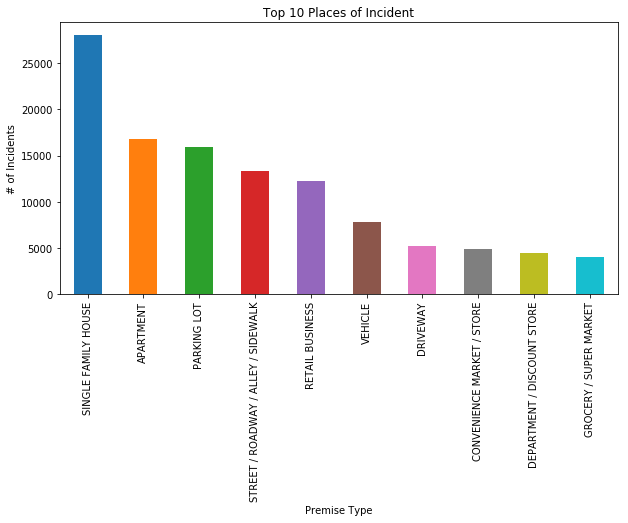

In [49]:
# Most common place a crime takes place
premise_count = crime_clean.groupby('premise_type')['incident_num'].count().sort_values(ascending=False)
premise_count
premise_count[0:10].plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Places of Incident')
plt.xlabel('Premise Type')
plt.ylabel('# of Incidents')
plt.show()

**Market Basket Analysis**

In [50]:
# Market Basket Analysis

# Import mlxtend packages
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules


In [51]:
# Create basket df
basket = crime_clean[['crime_cat', 'zip', 'premise_type', 'occ_on_month', 'occ_on_day', 'occ_on_year', 'occ_on_hr_grp', 'occ_on_dayofweek', 'occ_on_season']]
basket = pd.DataFrame(basket)
basket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148465 entries, 0 to 148467
Data columns (total 9 columns):
crime_cat           148465 non-null object
zip                 148465 non-null object
premise_type        148465 non-null object
occ_on_month        148465 non-null int64
occ_on_day          148465 non-null int64
occ_on_year         148465 non-null int64
occ_on_hr_grp       148465 non-null int64
occ_on_dayofweek    148465 non-null object
occ_on_season       148465 non-null object
dtypes: int64(4), object(5)
memory usage: 11.3+ MB


In [52]:
# change df columns to catergory
basket['crime_cat'] = basket['crime_cat'].astype('category')
basket['zip'] = basket['zip'].astype('category')
basket['premise_type'] = basket['premise_type'].astype('category')
basket['occ_on_season'] = basket['occ_on_season'].astype('category')
basket['occ_on_dayofweek'] = basket['occ_on_dayofweek'].astype('category')

In [53]:
# assign category codes
basket['crime_cat_code'] = basket['crime_cat'].cat.codes
basket['zip_code'] = basket['zip'].cat.codes
basket['premise_type_code'] = basket['premise_type'].cat.codes
basket['occ_on_season_code'] = basket['occ_on_season'].cat.codes
basket['occ_on_dayofweek_code'] = basket['occ_on_dayofweek'].cat.codes

In [54]:
basket.info()
basket.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148465 entries, 0 to 148467
Data columns (total 14 columns):
crime_cat                148465 non-null category
zip                      148465 non-null category
premise_type             148465 non-null category
occ_on_month             148465 non-null int64
occ_on_day               148465 non-null int64
occ_on_year              148465 non-null int64
occ_on_hr_grp            148465 non-null int64
occ_on_dayofweek         148465 non-null category
occ_on_season            148465 non-null category
crime_cat_code           148465 non-null int8
zip_code                 148465 non-null int8
premise_type_code        148465 non-null int8
occ_on_season_code       148465 non-null int8
occ_on_dayofweek_code    148465 non-null int8
dtypes: category(5), int64(4), int8(5)
memory usage: 7.1 MB


,crime_cat,zip,premise_type,occ_on_month,occ_on_day,occ_on_year,occ_on_hr_grp,occ_on_dayofweek,occ_on_season,crime_cat_code,zip_code,premise_type_code,occ_on_season_code,occ_on_dayofweek_code
0,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE,11,1,2015,1,Sunday,Fall,5,21,82,0,3
1,RAPE,85006,SINGLE FAMILY HOUSE,11,1,2015,1,Sunday,Fall,7,2,82,0,3
2,LARCENY-THEFT,85014,APARTMENT,11,1,2015,1,Sunday,Fall,4,8,6,0,3
3,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE,11,1,2015,1,Sunday,Fall,5,79,82,0,3
4,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE,11,1,2015,1,Sunday,Fall,5,31,82,0,3


In [55]:
# create df with encoded columns
basket_1 = basket[['crime_cat_code', 'zip_code', 'premise_type_code', 'occ_on_month', 'occ_on_day', 'occ_on_year', 'occ_on_hr_grp', 'occ_on_dayofweek_code', 'occ_on_season_code']]
basket_1.head()

,crime_cat_code,zip_code,premise_type_code,occ_on_month,occ_on_day,occ_on_year,occ_on_hr_grp,occ_on_dayofweek_code,occ_on_season_code
0,5,21,82,11,1,2015,1,3,0
1,7,2,82,11,1,2015,1,3,0
2,4,8,6,11,1,2015,1,3,0
3,5,79,82,11,1,2015,1,3,0
4,5,31,82,11,1,2015,1,3,0


In [21]:
# one-hot encode the data and frequent items
te = TransactionEncoder()
te_ary = te.fit(basket_1).transform(basket_1)
basket_encode = pd.DataFrame(te_ary, columns=te.columns_)
basket_encode.head()

,_,a,c,d,e,f,g,h,i,k,m,n,o,p,r,s,t,w,y,z
0,True,True,True,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False
1,True,False,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
2,True,False,True,True,True,False,False,False,True,False,True,False,True,True,True,True,True,False,True,False
3,True,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False,True,False,False,False
4,True,True,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False


In [22]:
te.columns_

['_',
 'a',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'w',
 'y',
 'z']

In [23]:
frequent_itemsets = apriori(basket_encode, min_support=0.025, use_colnames=True)
frequent_itemsets

,support,itemsets


In [20]:
# add itemsets length column
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# filter itemsets by condition
freq_50 = frequent_itemsets[ (frequent_itemsets['length'] >=2) & (frequent_itemsets['support'] >0.5)].count()
freq_25 = frequent_itemsets[ (frequent_itemsets['length'] >=2) & (frequent_itemsets['support'] >0.25)].count()
freq_10 = frequent_itemsets[ (frequent_itemsets['length'] >=2) & (frequent_itemsets['support'] >0.1)].count()

print(freq_50, freq_25, freq_10)

support     2
itemsets    2
length      2
dtype: int64 support     21
itemsets    21
length      21
dtype: int64 support     83
itemsets    83
length      83
dtype: int64


In [21]:
# Confidence Metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.025)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.613552,0.698050,0.378412,0.616757,0.883542,-0.049878,0.787881
1,(1),(0),0.698050,0.613552,0.378412,0.542099,0.883542,-0.049878,0.843956
2,(0),(2),0.613552,0.761068,0.431779,0.703736,0.924668,-0.035176,0.806482
3,(2),(0),0.761068,0.613552,0.431779,0.567332,0.924668,-0.035176,0.893175
4,(0),(3),0.613552,0.620409,0.371711,0.605834,0.976507,-0.008943,0.963023
5,(3),(0),0.620409,0.613552,0.371711,0.599138,0.976507,-0.008943,0.964042
6,(0),(4),0.613552,0.713832,0.413195,0.673447,0.943426,-0.024778,0.876332
7,(4),(0),0.713832,0.613552,0.413195,0.578841,0.943426,-0.024778,0.917582
8,(0),(5),0.613552,0.469134,0.262419,0.427704,0.911688,-0.025419,0.927607
9,(5),(0),0.469134,0.613552,0.262419,0.559368,0.911688,-0.025419,0.877032


In [22]:
# Lift Metric
rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules_1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(8),0.613552,0.154737,0.119530,0.194816,1.259016,0.024591,1.049777
1,(8),(0),0.154737,0.613552,0.119530,0.772472,1.259016,0.024591,1.698464
2,(0),(9),0.613552,0.153477,0.119409,0.194619,1.268061,0.025242,1.051083
3,(9),(0),0.153477,0.613552,0.119409,0.778022,1.268061,0.025242,1.740926
4,(0),(10),0.613552,0.160550,0.135042,0.220099,1.370907,0.036536,1.076354
5,(10),(0),0.160550,0.613552,0.135042,0.841123,1.370907,0.036536,2.432367
6,(11),(3),0.178864,0.620409,0.151079,0.844662,1.361460,0.040111,2.443647
7,(3),(11),0.620409,0.178864,0.151079,0.243516,1.361460,0.040111,1.085464
8,(4),(44),0.713832,0.027542,0.026350,0.036913,1.340251,0.006689,1.009730
9,(44),(4),0.027542,0.713832,0.026350,0.956713,1.340251,0.006689,6.610976


**Inferential Statistics**

In [56]:
import scipy.stats as stats

# create sample from basket_1 dataframe n=10000 rows
basket_rand_samp = basket_1.sample(n=10000, random_state=99)
basket_rand_samp.head()

# describe the basket_1
basket_rand_samp.describe()

,crime_cat_code,zip_code,premise_type_code,occ_on_month,occ_on_day,occ_on_year,occ_on_hr_grp,occ_on_dayofweek_code,occ_on_season_code
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.610900,22.266600,58.686300,6.567300,15.79830,2016.491400,3.853200,2.978800,1.593600
std,1.670862,18.558334,28.736344,3.700249,8.83303,0.716504,1.650734,2.039747,1.169776
min,0.000000,0.000000,0.000000,1.000000,1.00000,2015.000000,1.000000,0.000000,0.000000
25%,2.000000,10.000000,30.000000,3.000000,8.00000,2016.000000,3.000000,1.000000,0.000000
50%,4.000000,19.000000,68.000000,7.000000,16.00000,2016.000000,4.000000,3.000000,2.000000
75%,4.000000,29.000000,82.000000,10.000000,23.00000,2017.000000,5.000000,5.000000,3.000000
max,8.000000,98.000000,93.000000,12.000000,31.00000,2018.000000,6.000000,6.000000,3.000000


**1. Compare Crime Category with Zip Code**

  * **Null Hypothesis:** There is no association between the crime type and zip code.
  * **Alternate Hypothesis:** There is an association between the crime type and zip code.

In [57]:
# use contingency table and chi-square to test association
con_table = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.zip_code)
con_table

zip_code,0,1,2,3,4,5,6,7,8,9,...,76,78,79,80,81,84,88,90,95,98
crime_cat_code,,,,,,,,,,,,,,,,,,,,,
0,12,6,21,21,50,32,1,8,10,27,...,2,1,1,9,1,0,15,8,0,0
1,2,0,2,2,3,1,0,2,0,6,...,0,0,0,2,0,0,1,0,0,0
2,17,10,36,29,62,68,15,41,37,67,...,9,10,4,22,2,7,42,22,0,1
3,14,11,23,28,34,46,3,14,19,35,...,0,1,0,3,0,0,2,2,0,0
4,57,72,94,51,246,172,40,117,104,271,...,18,22,11,40,15,16,100,49,0,0
5,6,12,21,19,59,68,4,23,16,51,...,1,2,0,9,2,5,15,17,1,1
6,0,0,2,1,2,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,5,2,8,6,4,4,5,4,4,6,...,2,0,0,1,1,0,2,1,0,0
8,5,4,10,4,24,23,6,6,12,30,...,0,2,1,0,1,1,8,7,0,0


In [58]:
# contingecy table with percentages
con_table_percent = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.zip_code).apply(lambda r: (r/r.sum())*100, axis=1)
con_table_percent

zip_code,0,1,2,3,4,5,6,7,8,9,...,76,78,79,80,81,84,88,90,95,98
crime_cat_code,,,,,,,,,,,,,,,,,,,,,
0,1.637108,0.818554,2.864939,2.864939,6.821282,4.365621,0.136426,1.091405,1.364256,3.683492,...,0.272851,0.136426,0.136426,1.227831,0.136426,0.000000,2.046385,1.091405,0.000000,0.000000
1,3.448276,0.000000,3.448276,3.448276,5.172414,1.724138,0.000000,3.448276,0.000000,10.344828,...,0.000000,0.000000,0.000000,3.448276,0.000000,0.000000,1.724138,0.000000,0.000000,0.000000
2,0.980392,0.576701,2.076125,1.672434,3.575548,3.921569,0.865052,2.364475,2.133795,3.863899,...,0.519031,0.576701,0.230681,1.268743,0.115340,0.403691,2.422145,1.268743,0.000000,0.057670
3,1.988636,1.562500,3.267045,3.977273,4.829545,6.534091,0.426136,1.988636,2.698864,4.971591,...,0.000000,0.142045,0.000000,0.426136,0.000000,0.000000,0.284091,0.284091,0.000000,0.000000
4,1.137498,1.436839,1.875873,1.017761,4.909200,3.432449,0.798244,2.334863,2.075434,5.408102,...,0.359210,0.439034,0.219517,0.798244,0.299341,0.319298,1.995610,0.977849,0.000000,0.000000
5,0.520833,1.041667,1.822917,1.649306,5.121528,5.902778,0.347222,1.996528,1.388889,4.427083,...,0.086806,0.173611,0.000000,0.781250,0.173611,0.434028,1.302083,1.475694,0.086806,0.086806
6,0.000000,0.000000,10.526316,5.263158,10.526316,5.263158,0.000000,0.000000,0.000000,10.526316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3.144654,1.257862,5.031447,3.773585,2.515723,2.515723,3.144654,2.515723,2.515723,3.773585,...,1.257862,0.000000,0.000000,0.628931,0.628931,0.000000,1.257862,0.628931,0.000000,0.000000
8,1.162791,0.930233,2.325581,0.930233,5.581395,5.348837,1.395349,1.395349,2.790698,6.976744,...,0.000000,0.465116,0.232558,0.000000,0.232558,0.232558,1.860465,1.627907,0.000000,0.000000


In [59]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table)
print(('Chi-Square:', chi2),('p-value:', p))


('Chi-Square:', 1004.2233298570616) ('p-value:', 5.349066539815047e-32)


The p-value is very low approcahing 0 therefore the null hypothesis is rejected which indicates there is an association between crime type and the zip code.

**2. Compare Crime Category with Time Crime Occurred**

  * **Null Hypothesis:** There is no association between the crime type and time of day crime occurred.
  * **Alternate Hypothesis:** There is an association between crime type and time of day crime occurred.

In [60]:
# contignecy table crime type and time of day
con_table_1 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_hr_grp)
con_table_1

occ_on_hr_grp,1,2,3,4,5,6
crime_cat_code,,,,,,
0,119,48,91,121,196,158
1,12,11,11,7,5,12
2,227,270,383,327,325,202
3,69,65,108,132,185,145
4,653,322,748,1136,1230,922
5,158,134,158,164,231,307
6,7,2,1,2,4,3
7,56,11,20,17,26,29
8,82,39,53,66,80,110


In [61]:
# contingency table with percentages
con_table_percent_1 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_hr_grp).apply(lambda r: (r/r.sum())*100, axis=1)
con_table_percent_1

occ_on_hr_grp,1,2,3,4,5,6
crime_cat_code,,,,,,
0,16.234652,6.548431,12.414734,16.507503,26.739427,21.555252
1,20.689655,18.965517,18.965517,12.068966,8.620690,20.689655
2,13.091119,15.570934,22.087659,18.858131,18.742791,11.649366
3,9.801136,9.232955,15.340909,18.750000,26.278409,20.596591
4,13.031331,6.425863,14.927160,22.670126,24.545999,18.399521
5,13.715278,11.631944,13.715278,14.236111,20.052083,26.649306
6,36.842105,10.526316,5.263158,10.526316,21.052632,15.789474
7,35.220126,6.918239,12.578616,10.691824,16.352201,18.238994
8,19.069767,9.069767,12.325581,15.348837,18.604651,25.581395


In [62]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table_1)
print(('Chi-Square:', chi2),('p-value:', p))


('Chi-Square:', 486.81959183859976) ('p-value:', 3.7925484826599356e-78)


The p-value is very low approaching 0 therefore the null hypothesis is rejected which indicates there is an association between crime type and time of day crime occurred.

**3. Compare Crime Category with Season of the year**

  * **Null Hypothesis:** There is no association between crime type and season of the year
  * **Alternate Hypothesis** There is an association between crime type and season of the year.

In [63]:
# contignecy table crime type and season
con_table_2 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_season_code)
con_table_2

occ_on_season_code,0,1,2,3
crime_cat_code,,,,
0,185,168,151,229
1,14,15,12,17
2,438,382,372,542
3,183,139,154,228
4,1238,1114,1091,1568
5,308,231,257,356
6,6,2,4,7
7,32,33,40,54
8,103,94,106,127


In [64]:
# contingency table with percentages
con_table_percent_2 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_season_code).apply(lambda r: (r/r.sum())*100, axis=1)
con_table_percent_2

occ_on_season_code,0,1,2,3
crime_cat_code,,,,
0,25.238745,22.919509,20.600273,31.241473
1,24.137931,25.862069,20.689655,29.310345
2,25.259516,22.029988,21.453287,31.257209
3,25.994318,19.744318,21.875000,32.386364
4,24.705648,22.231092,21.772101,31.291159
5,26.736111,20.052083,22.309028,30.902778
6,31.578947,10.526316,21.052632,36.842105
7,20.125786,20.754717,25.157233,33.962264
8,23.953488,21.860465,24.651163,29.534884


In [65]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table_2)
print(('Chi-Square:', chi2),('p-value:', p))


('Chi-Square:', 13.943184697207888) ('p-value:', 0.9479231863889193)


The p-value calculated is 0.94 which is well above .05 therefore the null hypothesis is not rejected and the results were not statistically significant. Based on this we can test if individual months have a better association.

**4. Compare Crime Category with Month**

  * **Null Hypothesis:** There is no association between crime type and premise type.
  * **Alternate Hypothesis** There is an association between crime type and premise type.

In [66]:
# contignecy table crime type and month
con_table_3 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_month)
con_table_3

occ_on_month,1,2,3,4,5,6,7,8,9,10,11,12
crime_cat_code,,,,,,,,,,,,
0,73,70,58,52,58,50,52,49,55,59,71,86
1,7,3,6,3,6,6,3,3,4,4,6,7
2,189,147,102,136,144,122,116,134,142,124,172,206
3,71,81,50,35,54,54,54,46,43,60,80,76
4,586,449,388,359,367,363,370,358,340,387,511,533
5,120,102,62,79,90,84,90,83,89,98,121,134
6,4,1,0,2,0,3,0,1,1,2,3,2
7,24,11,11,14,8,10,16,14,8,9,15,19
8,46,36,24,37,33,25,47,34,34,30,39,45


In [67]:
# contingency table with percentages
con_table_percent_3 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.occ_on_month).apply(lambda r: (r/r.sum())*100, axis=1)
con_table_percent_3

occ_on_month,1,2,3,4,5,6,7,8,9,10,11,12
crime_cat_code,,,,,,,,,,,,
0,9.959072,9.549795,7.912688,7.094134,7.912688,6.821282,7.094134,6.684857,7.503411,8.049113,9.686221,11.732606
1,12.068966,5.172414,10.344828,5.172414,10.344828,10.344828,5.172414,5.172414,6.896552,6.896552,10.344828,12.068966
2,10.899654,8.477509,5.882353,7.843137,8.304498,7.035755,6.689735,7.727797,8.189158,7.151096,9.919262,11.880046
3,10.085227,11.505682,7.102273,4.971591,7.670455,7.670455,7.670455,6.534091,6.107955,8.522727,11.363636,10.795455
4,11.694273,8.960287,7.742965,7.164239,7.323887,7.244063,7.383756,7.144283,6.785073,7.723009,10.197565,10.636599
5,10.416667,8.854167,5.381944,6.857639,7.812500,7.291667,7.812500,7.204861,7.725694,8.506944,10.503472,11.631944
6,21.052632,5.263158,0.000000,10.526316,0.000000,15.789474,0.000000,5.263158,5.263158,10.526316,15.789474,10.526316
7,15.094340,6.918239,6.918239,8.805031,5.031447,6.289308,10.062893,8.805031,5.031447,5.660377,9.433962,11.949686
8,10.697674,8.372093,5.581395,8.604651,7.674419,5.813953,10.930233,7.906977,7.906977,6.976744,9.069767,10.465116


In [68]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table_3)
print(('Chi-Square:', chi2),('p-value:', p))


('Chi-Square:', 79.9432474127848) ('p-value:', 0.7177663811944224)


The p-value is 0.72 which is above .05 therefore the null hypothesis is not rejected. This tells us there is no significant association between the crime type and month.

**5. Compare Crime Category with Premise Type**

  * **Null Hypothesis:** There is no association between crime type and premise type.
  * **Alternate Hypothesis** There is an association between crime type and premise type.

In [69]:
# contignecy table crime type and premise type
con_table_4 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.premise_type_code)
con_table_4

premise_type_code,0,1,2,3,4,5,6,7,8,9,...,82,83,84,86,87,88,89,91,92,93
crime_cat_code,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,2,0,191,1,0,0,...,141,0,2,166,0,0,0,10,20,0
1,0,0,0,0,0,0,3,0,0,0,...,6,0,0,3,0,0,0,24,2,1
2,14,10,0,2,2,0,276,0,1,3,...,928,0,15,3,0,0,0,4,6,12
3,1,0,0,0,5,0,42,0,0,0,...,42,0,5,195,0,0,0,3,103,0
4,3,2,0,4,28,1,434,1,0,3,...,494,73,66,208,21,5,1,45,367,12
5,0,0,0,0,0,0,164,0,0,4,...,188,0,2,188,0,0,0,22,20,3
6,0,0,0,0,0,0,3,0,0,0,...,5,0,0,2,0,0,0,2,0,0
7,0,0,0,0,0,0,31,0,0,0,...,48,0,0,11,0,0,0,10,12,0
8,1,0,0,0,1,0,24,0,0,0,...,18,0,20,113,0,0,1,1,16,0


In [70]:
# contingency table with percentages
con_table_percent_4 = pd.crosstab(index=basket_rand_samp.crime_cat_code, columns=basket_rand_samp.premise_type_code).apply(lambda r: (r/r.sum())*100, axis=1)
con_table_percent_4

premise_type_code,0,1,2,3,4,5,6,7,8,9,...,82,83,84,86,87,88,89,91,92,93
crime_cat_code,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.272851,0.000000,0.272851,0.000000,26.057299,0.136426,0.00000,0.000000,...,19.236016,0.000000,0.272851,22.646658,0.000000,0.00000,0.000000,1.364256,2.728513,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.172414,0.000000,0.00000,0.000000,...,10.344828,0.000000,0.000000,5.172414,0.000000,0.00000,0.000000,41.379310,3.448276,1.724138
2,0.807382,0.576701,0.000000,0.115340,0.115340,0.000000,15.916955,0.000000,0.05767,0.173010,...,53.517878,0.000000,0.865052,0.173010,0.000000,0.00000,0.000000,0.230681,0.346021,0.692042
3,0.142045,0.000000,0.000000,0.000000,0.710227,0.000000,5.965909,0.000000,0.00000,0.000000,...,5.965909,0.000000,0.710227,27.698864,0.000000,0.00000,0.000000,0.426136,14.630682,0.000000
4,0.059868,0.039912,0.000000,0.079824,0.558771,0.019956,8.660946,0.019956,0.00000,0.059868,...,9.858312,1.456795,1.317102,4.150868,0.419078,0.09978,0.019956,0.898024,7.323887,0.239473
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.236111,0.000000,0.00000,0.347222,...,16.319444,0.000000,0.173611,16.319444,0.000000,0.00000,0.000000,1.909722,1.736111,0.260417
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.789474,0.000000,0.00000,0.000000,...,26.315789,0.000000,0.000000,10.526316,0.000000,0.00000,0.000000,10.526316,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.496855,0.000000,0.00000,0.000000,...,30.188679,0.000000,0.000000,6.918239,0.000000,0.00000,0.000000,6.289308,7.547170,0.000000
8,0.232558,0.000000,0.000000,0.000000,0.232558,0.000000,5.581395,0.000000,0.00000,0.000000,...,4.186047,0.000000,4.651163,26.279070,0.000000,0.00000,0.232558,0.232558,3.720930,0.000000


In [71]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table_4)
print(('Chi-Square:', chi2),('p-value:', p))


('Chi-Square:', 7301.15411820386) ('p-value:', 0.0)


The p-value is 0 therefore the null hypothesis is rejected which indicates there is an association between crime type and premise type.

****

**EDA and Inferential Statistics Summary**

The crime data set is categorical type data set. The graphs created show counts of the groups within each variable based on different filters. To draw insights from the data using visualizations some initial questions were asked:

  1. What are the top tredning crimes? 
  2. When do crimes occur: Month, Day, Year, Season?
  3. Do more crimes occur in certain zip codes?
  4. What is the most common place a crime occurs e.g. house, business, etc.?
  
**Answers:**
  * Top trending crimes are Larceny-Theft, Burglary, Motor Vehicle Theft, Drug Offenses
  * The most crimes occurred in the Winter months(Dec, Jan, Feb), Fridays and between the hours of 4-7pm.
  * Two zip codes stood out with the most crimes 85015 and 85008.
  * Crimes typically took place at Single Family Homes, Apartments, and Parking Lots.
  
These answers provide us with good information to look at how these categories are related. A technique to help idenitfy relationships or associations is Market Basket Analysis (MBA). MBA takes the data and determines what items are commonly associated e.g. people who purchase Milk & Bread also purchase cheese. **(Insert MBA results here)**

To further test the answers from the visualizations and MBA we can use Inferential Statistics. Inferential Statistics let us draw conclusions and predict outcomes. Based on the information from visualizations and MBA, hypotheses were written and tested on a set of sample data. The Chi-Square test statistic was used because we want to test the strength of association between variables. 

**1. Compare Crime Category with Zip Code**
  
  * **Null Hypothesis:** There is no association between the crime type and zip code.
  * **Alternate Hypothesis:** There is an association between the crime type and zip code.
  * **Answer:** P-value = 5.349066539815047e-32, null hypothesis is rejected
  
**2. Compare Crime Category with Time Crime Occurred**
  
  * **Null Hypothesis:** There is no association between the crime type and time of day crime occurred.
  * **Alternate Hypothesis:** There is an association between crime type and time of day crime occurred.
  * **Answer:** P-value = 3.7925484826599356e-78, null hypothesis is rejected
  
**3. Compare Crime Category with Season of the year**
  
  * **Null Hypothesis:** There is no association between crime type and season of the year.
  * **Alternate Hypothesis** There is an association between crime type and season of the year.
  * **Answer:** P-value = 0.9479231863889193, null hypothesis is not rejected
  
**4. Compare Crime Category with Month**

  * **Null Hypothesis:** There is no association between crime type and premise type.
  * **Alternate Hypothesis** There is an association between crime type and premise type.
  * **Answer:** P-value = 0.7177663811944224, null hypothesis is not rejected
  
**5. Compare Crime Category with Premise Type**

  * **Null Hypothesis:** There is no association between crime type and premise type.
  * **Alternate Hypothesis** There is an association between crime type and premise type.
  * **Answer:** P-value = 0.0, null hypothesis is rejected
  
From the hypothesis testing we see that Crime Type has significant associations with Zip Code, Time Crime Occurred and Premise Type. Crime Type did not show a significant association with the season of the year or months. 

****

## Machine Learning